In [1]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [2]:
ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [3]:
ninja_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    1000 non-null   float64
 1   Temperature             1000 non-null   float64
 2   Pressure                1000 non-null   float64
 3   Chemical Concentration  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


Data Transformation:

In [5]:
# Normalization
normalized_data = (ninja_data - ninja_data.mean()) / ninja_data.std()


In [8]:
# Logarithmic Scaling
# Apply logarithm to the 'Pressure' column
ninja_data['Pressure_log'] = np.log(ninja_data['Pressure'])

In [9]:
# Extracting time and a variable for Fourier Transformation
time = ninja_data['Time']
temperature = ninja_data['Temperature']

# Perform Fourier transformation
temperature_fft = np.fft.fft(temperature)


Statistical Analysis:

In [11]:
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration,Pressure_log
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754,6.920606
std,28.910854,3.574943,14.203350,1.436505,0.014023
min,0.000000,13.897407,990.284418,2.559310,6.897992
25%,25.000000,16.386984,998.852247,3.576024,6.906607
50%,50.000000,20.008666,1012.950967,4.970976,6.920623
75%,75.000000,23.570373,1027.062114,6.398067,6.934458
max,100.000000,26.030294,1035.471676,7.486763,6.942612


In [13]:
# Calculate the correlation matrix
correlation_matrix = ninja_data.corr()
print(correlation_matrix)


                            Time  Temperature  Pressure  \
Time                    1.000000    -0.770696 -0.001946   
Temperature            -0.770696     1.000000  0.007112   
Pressure               -0.001946     0.007112  1.000000   
Chemical Concentration -0.156113    -0.003277 -0.000863   
Pressure_log           -0.001961     0.007111  0.999987   

                        Chemical Concentration  Pressure_log  
Time                                 -0.156113     -0.001961  
Temperature                          -0.003277      0.007111  
Pressure                             -0.000863      0.999987  
Chemical Concentration                1.000000     -0.000853  
Pressure_log                         -0.000853      1.000000  


In [14]:
#Hypoyhesis testing
from scipy.stats import ttest_ind
#test 2 groups with temp. below and upper 50 .
time_group_1 = ninja_data[ninja_data['Time'] < 50]['Temperature']
time_group_2 = ninja_data[ninja_data['Time'] >= 50]['Temperature']

# Perform independent t-test
t_stat, p_value = ttest_ind(time_group_1, time_group_2)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 62.589694287425, p-value: 0.0


T-statistic: 62.5 - indicates a  highly significant difference between the mean temperatures at the two different time groups we've compared.

P-value close to 0 - suggests strong evidence against the null hypothesis. Reject the Null Hypothesis. It indicates that the difference in mean temperatures between the two time groups is highly statistically significant.
In most cases, when the p-value is extremely low (approaching zero), it suggests that the observed difference is unlikely to be due to random chance alone.

In [15]:
#Regression analysis
from scipy.stats import linregress

result = linregress(ninja_data['Temperature'], ninja_data['Chemical Concentration'])

print("Slope:", result.slope)
print("Intercept:", result.intercept)
print("R-value:", result.rvalue)
print("P-value:", result.pvalue)
print("Standard error:", result.stderr)


Slope: -0.001316811762159647
Intercept: 5.016060725227689
R-value: -0.0032770701660484046
P-value: 0.9175655752792355
Standard error: 0.012719509213534182


Slope:
The slope (-0.00132) represents the change in the 'Chemical Concentration' for each unit change in 'Temperature'. In this case, it suggests that there's a slight decrease in 'Chemical Concentration' (on average) as 'Temperature' increases, but the change is very small.
Intercept:
The intercept (5.02) is the value of 'Chemical Concentration' when 'Temperature' is zero. In practical terms, this might not have a meaningful interpretation, especially if 'Temperature' cannot be zero in our dataset.
R-value:
The R-value (-0.00328) represents the strength and direction of the linear relationship between 'Temperature' and 'Chemical Concentration'. In this case, it's very close to zero, suggesting an extremely weak linear relationship between these two variables.
P-value:
The p-value (0.917) indicates the statistical significance of the slope.A high p-value suggests that there's no significant linear relationship between 'Temperature' and 'Chemical Concentration'. In this case, a p-value of 0.917 indicates that the slope is not significantly different from zero, implying no meaningful linear association between these variables.
Standard error:
The standard error (0.0127) represents the average deviation of data points from the regression line. A lower standard error generally indicates that the regression line fits the data well. However, the context of a high p-value and a near-zero R-value suggests that the regression line might not be a good model for these variables.

In summary, based on these results, it seems that 'Temperature' may not be a good predictor for 'Chemical Concentration' in a linear regression model. The extremely weak relationship and the high p-value indicate that there might not be a meaningful linear association between these two variables in your dataset.

Data Visualization:

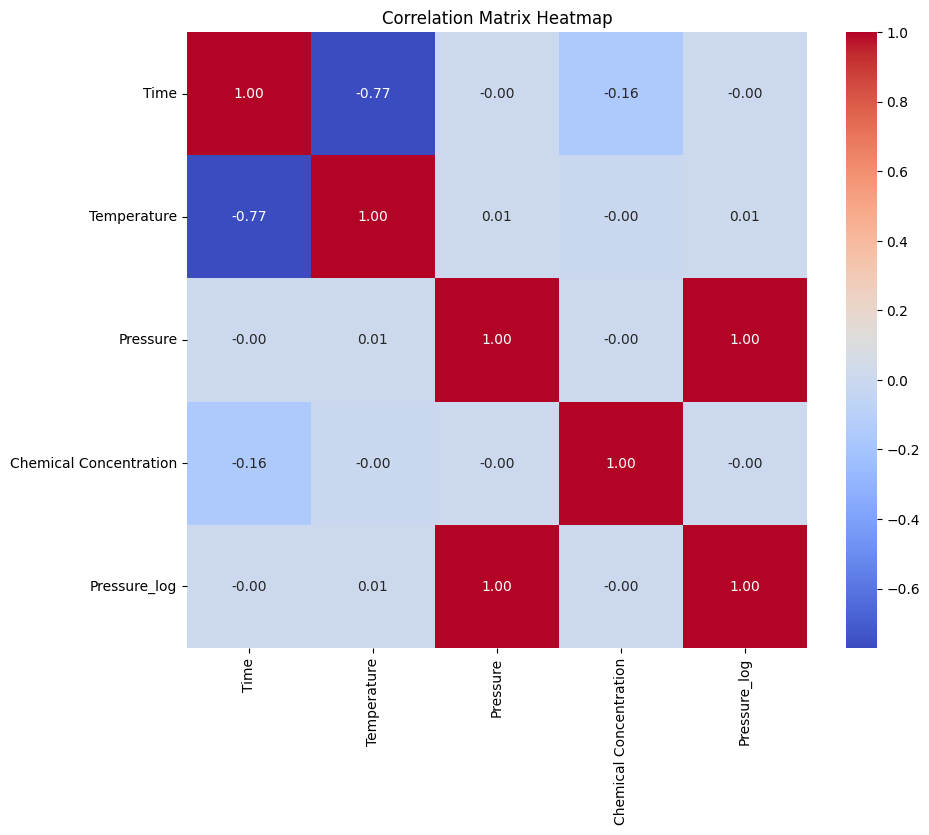

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = ninja_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

We can observe a strong negative relatioship between time and temperature. The correlation of all other variable are close to 0, which means that there are no correlation, these variables are not depends one on another.

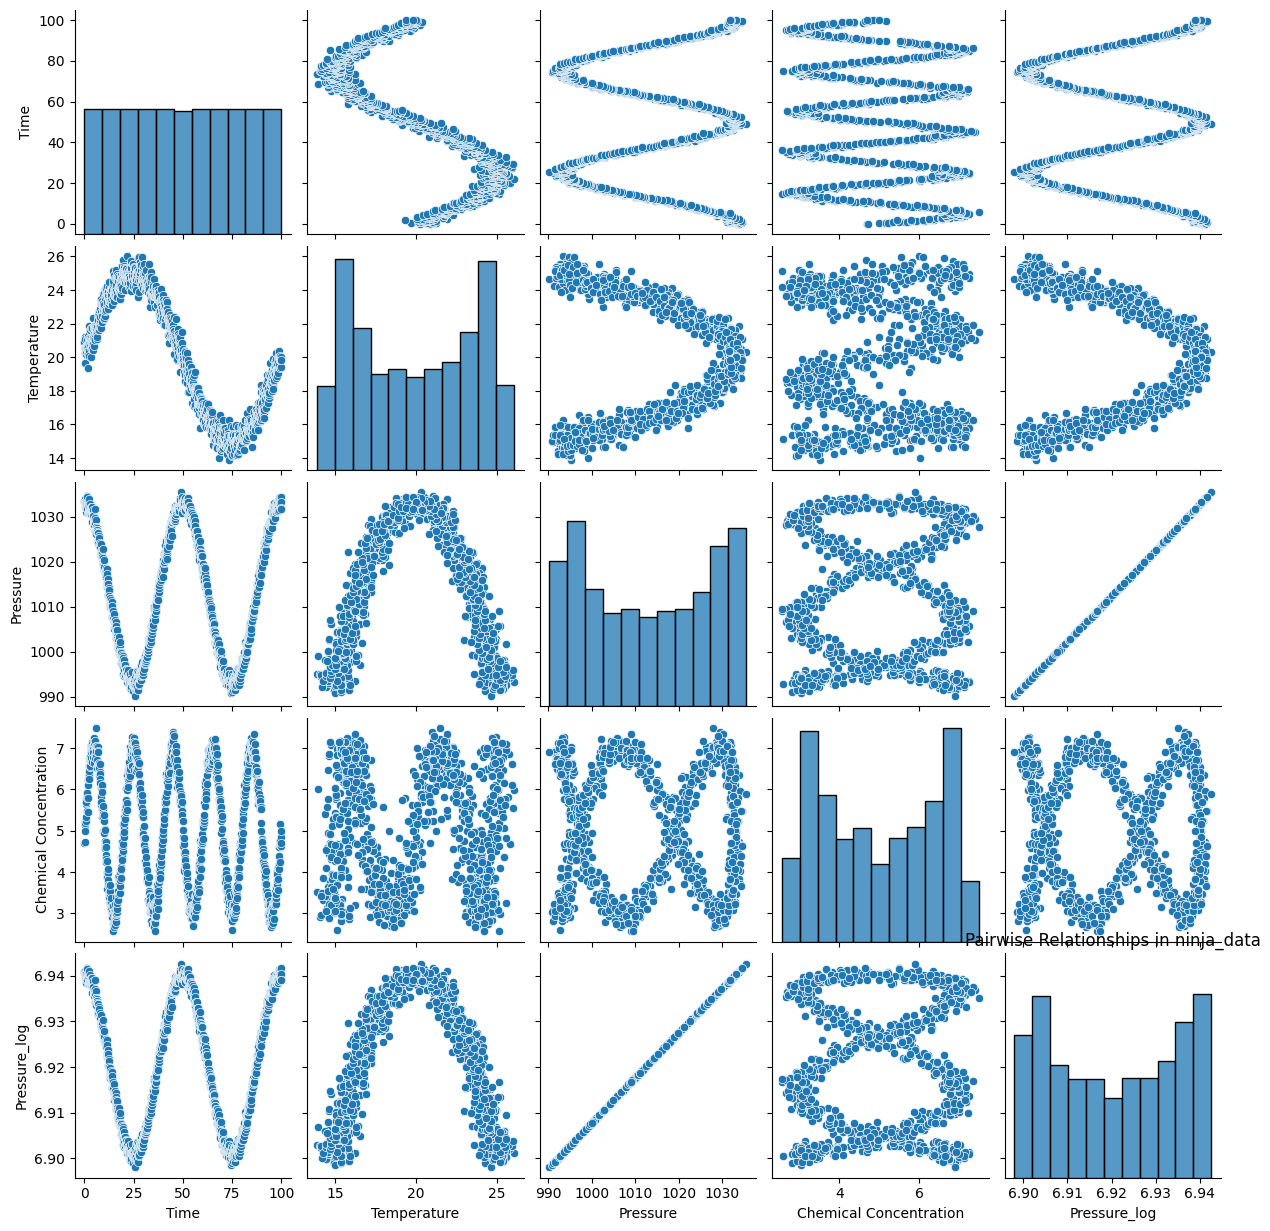

In [17]:
import seaborn as sns

# Create pairplot
sns.pairplot(ninja_data)
plt.title('Pairwise Relationships in ninja_data')
plt.show()


Along the diagonal, we can see histograms representing the distribution of each variable.
We can observe points clustered around a line for variables that have a strong linear relationship. If the points spread randomly, there might not be a strong linear relationship between those variables.



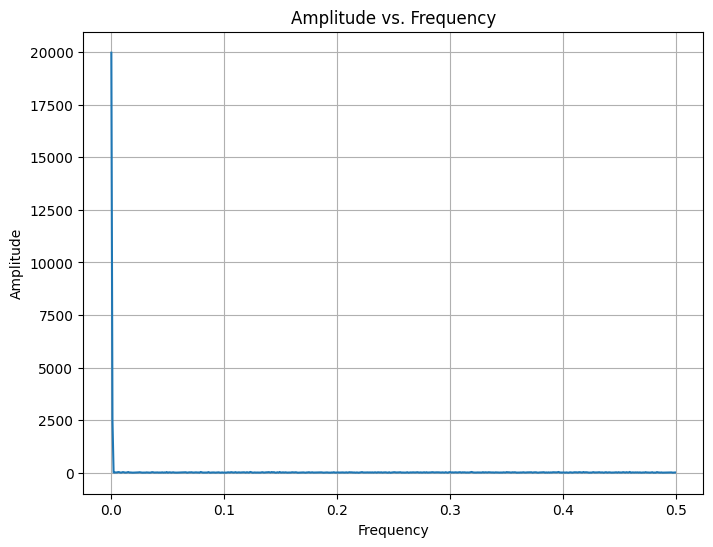

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming temperature_fft contains the Fourier-transformed data

# Calculate the amplitude (absolute values) of the Fourier-transformed data
amplitude = np.abs(temperature_fft)

# Calculate the frequency range
n = len(temperature_fft)
time_step = 1  # Assuming uniform time steps
frequency = np.fft.fftfreq(n, d=time_step)
frequency = frequency[:n//2]  # Consider only positive frequencies

# Plot amplitude vs. frequency
plt.figure(figsize=(8, 6))
plt.plot(frequency, amplitude[:n//2])
plt.title('Amplitude vs. Frequency')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


This plot show the amplitude (strength) of various frequency components present in the Fourier-transformed 'Temperature' data. The x-axis represents frequency, while the y-axis represents the amplitude of each frequency component. It helps in identifying dominant frequencies and analyzing the frequency composition within the temperature signal.

The practical applications of such analysis could be in :
-Environmental Monitoring and Forecasting
-Industrial Process Optimization
-Data-Driven Decision-Making.

In summary, these insights offer valuable guidance for practical applications across various fields while aligning with theoretical concepts such as complexity in systems, statistical inference, and advanced analysis methods. They emphasize the need for a nuanced approach, encouraging the integration of diverse methodologies to better comprehend multifaceted real-world phenomena.